In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("electricity_demand_data.xlsx")

In [3]:
df.head()

,Date,North Division Demand,North Division Shortage,West Division Demand,West Division Shortage,South Division Demand,South Division Shortage,East Division Demand,East Division Shortage,NorthEast Division Demand,...,Total Shortage,Temperature (C),Humidity (%),Wind Speed (kmph),Day,is_holiday,Weather_fog,Weather_partly-cloudy-day,Weather_rain,Weather_wind
0,2014-01-05,38635,2370.0,37641,152.0,32479,2147.0,13743,207.0,2094,...,5030.0,53.6,93.3,6.4,Sunday,0,True,False,False,False
1,2014-01-06,38768,2370.0,38730,237.0,33033,1903.0,14449,466.0,2190,...,5085.0,50.5,92.2,7.7,Monday,0,True,False,False,False
2,2014-01-07,39104,2237.0,38900,323.0,33104,1616.0,14152,794.0,2022,...,5204.0,52.4,74.5,8.5,Tuesday,0,True,False,False,False
3,2014-01-08,39376,2157.0,38471,444.0,33428,1511.0,14525,121.0,2113,...,4371.0,52.3,77.3,6.9,Wednesday,0,True,False,False,False
4,2014-01-09,40774,1607.0,38686,312.0,32890,1357.0,15352,0.0,2104,...,3422.0,53.0,85.8,6.9,Thursday,0,True,False,False,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776 entries, 0 to 1775
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         1776 non-null   datetime64[ns]
 1   North Division Demand        1776 non-null   int64         
 2   North Division Shortage      1587 non-null   float64       
 3   West Division Demand         1776 non-null   int64         
 4   West Division Shortage       812 non-null    float64       
 5   South Division Demand        1776 non-null   int64         
 6   South Division Shortage      508 non-null    float64       
 7   East Division Demand         1776 non-null   int64         
 8   East Division Shortage       1028 non-null   float64       
 9   NorthEast Division Demand    1776 non-null   int64         
 10  NorthEast Division Shortage  1348 non-null   float64       
 11  Total Demand                 1776 non-null 

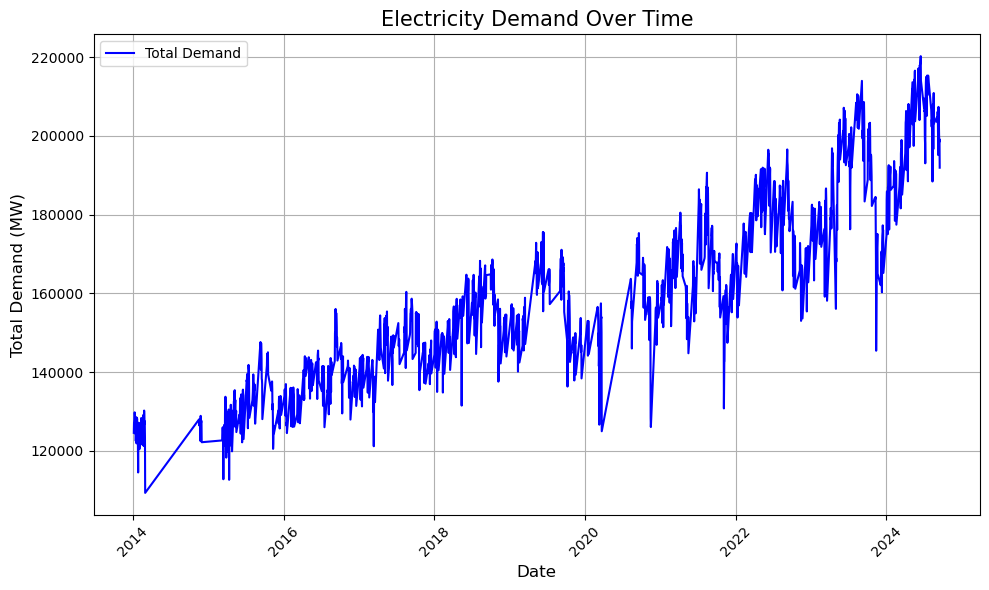

In [5]:
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Total Demand'], label='Total Demand', color='b')

plt.title('Electricity Demand Over Time', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Demand (MW)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

<Axes: >

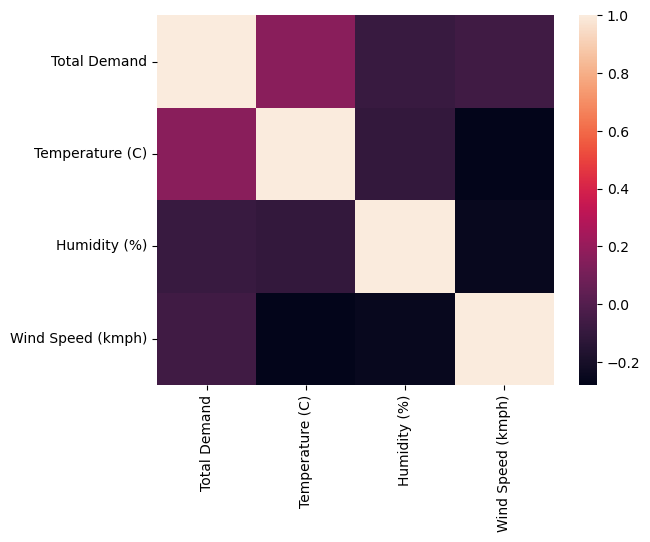

In [9]:
# import seaborn as sns
# correlation_matrix = df[['Total Demand', 'Temperature (C)', 'Humidity (%)', 'Wind Speed (kmph)']].corr()

# sns.heatmap(correlation_matrix)

In [9]:
# df.replace({True: 1, False:0}, inplace=True)

In [11]:
# df.to_excel("new_data.xlsx")

In [6]:
missing_vals = df.isnull().sum()
missing_vals[missing_vals>0]

North Division Shortage         189
West Division Shortage          964
South Division Shortage        1268
East Division Shortage          748
NorthEast Division Shortage     428
Total Shortage                   66
dtype: int64

In [7]:
missing_val_columns = ['North Division Shortage', 'West Division Shortage', 
                    'South Division Shortage', 'East Division Shortage', 
                    'NorthEast Division Shortage', 'Total Shortage']

df[missing_val_columns] = df[missing_val_columns].fillna(df[missing_val_columns].median())


In [8]:
missing_vals = df.isnull().sum()
missing_vals[missing_vals>0]

Series([], dtype: int64)

In [9]:
df = pd.get_dummies(df, columns=['Day'], drop_first=True)

In [10]:
df.head()

,Date,North Division Demand,North Division Shortage,West Division Demand,West Division Shortage,South Division Demand,South Division Shortage,East Division Demand,East Division Shortage,NorthEast Division Demand,...,Weather_fog,Weather_partly-cloudy-day,Weather_rain,Weather_wind,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,2014-01-05,38635,2370.0,37641,152.0,32479,2147.0,13743,207.0,2094,...,True,False,False,False,False,False,True,False,False,False
1,2014-01-06,38768,2370.0,38730,237.0,33033,1903.0,14449,466.0,2190,...,True,False,False,False,True,False,False,False,False,False
2,2014-01-07,39104,2237.0,38900,323.0,33104,1616.0,14152,794.0,2022,...,True,False,False,False,False,False,False,False,True,False
3,2014-01-08,39376,2157.0,38471,444.0,33428,1511.0,14525,121.0,2113,...,True,False,False,False,False,False,False,False,False,True
4,2014-01-09,40774,1607.0,38686,312.0,32890,1357.0,15352,0.0,2104,...,True,False,False,False,False,False,False,True,False,False


In [11]:
df.replace({True: 1, False:0}, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776 entries, 0 to 1775
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         1776 non-null   datetime64[ns]
 1   North Division Demand        1776 non-null   int64         
 2   North Division Shortage      1776 non-null   float64       
 3   West Division Demand         1776 non-null   int64         
 4   West Division Shortage       1776 non-null   float64       
 5   South Division Demand        1776 non-null   int64         
 6   South Division Shortage      1776 non-null   float64       
 7   East Division Demand         1776 non-null   int64         
 8   East Division Shortage       1776 non-null   float64       
 9   NorthEast Division Demand    1776 non-null   int64         
 10  NorthEast Division Shortage  1776 non-null   float64       
 11  Total Demand                 1776 non-null 

In [13]:
df.describe()

,Date,North Division Demand,North Division Shortage,West Division Demand,West Division Shortage,South Division Demand,South Division Shortage,East Division Demand,East Division Shortage,NorthEast Division Demand,...,Weather_fog,Weather_partly-cloudy-day,Weather_rain,Weather_wind,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
count,1776,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,...,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000,1776.000000
mean,2019-09-10 10:33:14.594594560,49192.952703,1049.511261,48689.209459,170.962838,39622.802928,633.777590,19910.514077,331.512950,2519.498311,...,0.082207,0.335023,0.218468,0.002815,0.140766,0.142455,0.143581,0.142455,0.145270,0.141892
min,2014-01-05 00:00:00,28413.000000,-16.000000,32590.000000,-44.000000,27823.000000,-215.000000,13105.000000,0.000000,463.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017-01-10 18:00:00,41732.000000,489.000000,42806.750000,128.500000,35610.500000,571.500000,17390.000000,250.000000,2262.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019-07-09 12:00:00,47736.000000,740.000000,47273.000000,128.500000,39069.000000,571.500000,19377.500000,295.500000,2452.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2022-06-10 06:00:00,54475.500000,1487.750000,54677.750000,128.500000,43365.000000,571.500000,21977.750000,314.000000,2695.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2024-09-15 00:00:00,80673.000000,8359.000000,67217.000000,3778.000000,53981.000000,3885.000000,29601.000000,2367.000000,3704.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,10009.105524,889.301076,7513.742139,226.788579,5170.783481,382.401195,3271.703947,229.536087,372.589105,...,0.274758,0.472131,0.413323,0.053000,0.347878,0.349615,0.350763,0.349615,0.352472,0.349038


<Axes: >

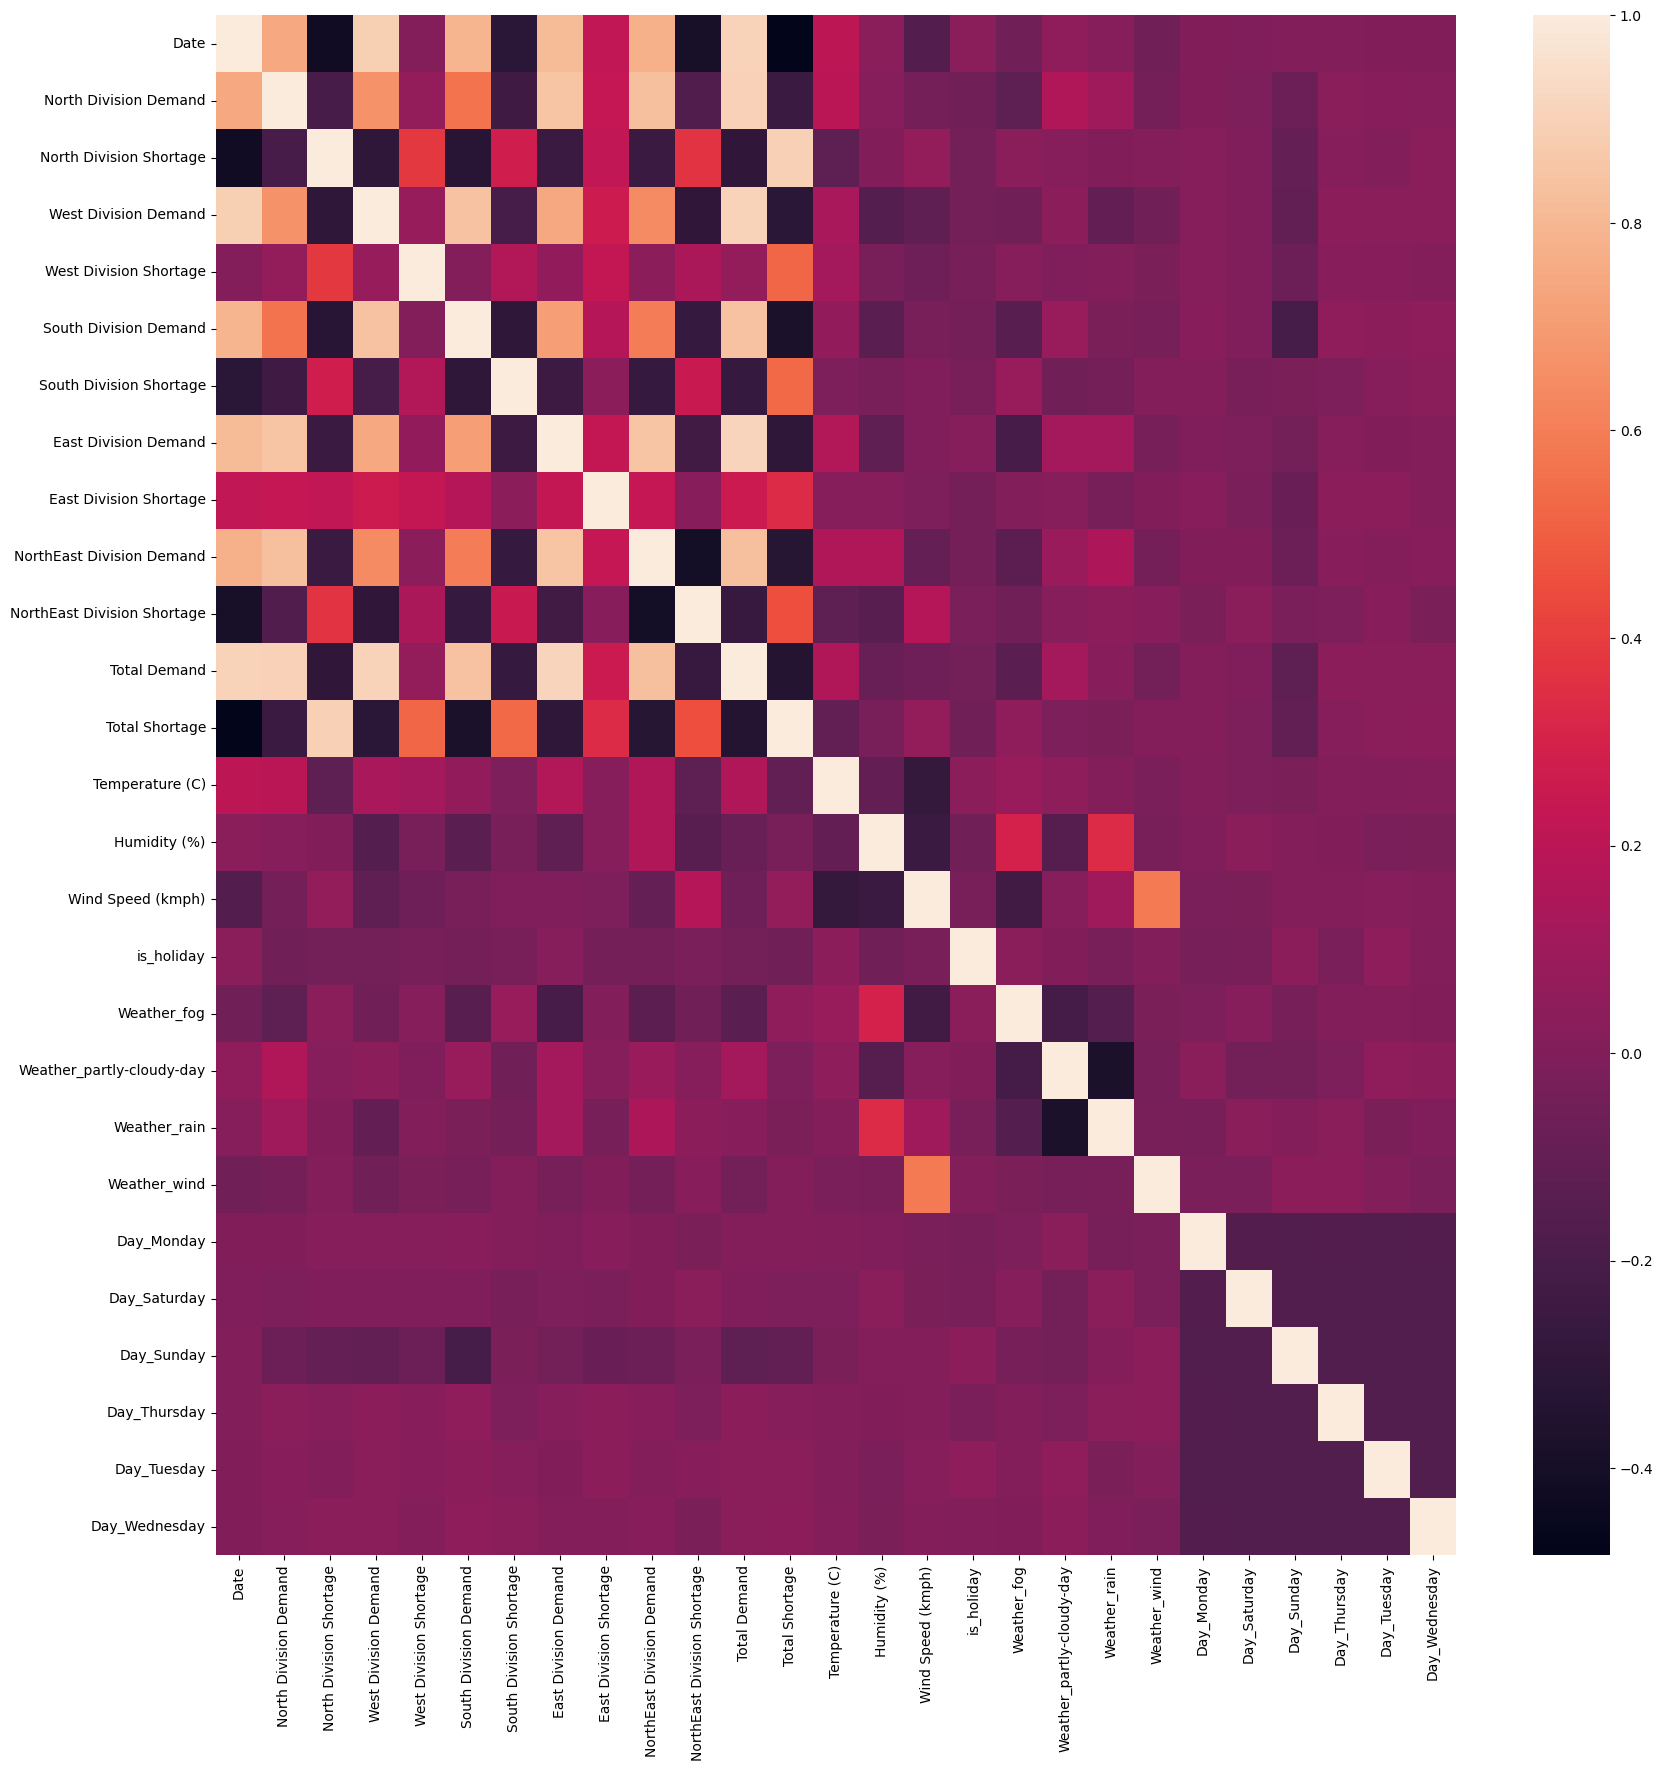

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix)

In [15]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define your target variable (Total Demand) and features
X = df.drop(columns=['Total Demand', 'Date'])  # Dropping the target and any irrelevant columns
y = df['Total Demand']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a model (RandomForest in this case)
model = RandomForestRegressor()

# Initialize RFE with the model and select the top 10 features (you can change this number)
rfe = RFE(estimator=model, n_features_to_select=10)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

print("Selected features:", selected_features)


Selected features: Index(['North Division Demand', 'West Division Demand',
       'South Division Demand', 'East Division Demand',
       'NorthEast Division Demand', 'NorthEast Division Shortage',
       'Total Shortage', 'Temperature (C)', 'Humidity (%)',
       'Wind Speed (kmph)'],
      dtype='object')


In [22]:
# rfe.support_

array([ True,  True,  True, False,  True, False,  True, False,  True,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False])

In [16]:
numeric_cols = ['North Division Demand', 'North Division Shortage',
       'West Division Demand', 'South Division Demand', 'East Division Demand',
       'NorthEast Division Demand', 'Total Shortage', 'Temperature (C)',
       'Humidity (%)', 'Wind Speed (kmph)']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [17]:
from sklearn.model_selection import train_test_split

X = df[['North Division Demand', 'North Division Shortage',
       'West Division Demand', 'South Division Demand', 'East Division Demand',
       'NorthEast Division Demand', 'Total Shortage', 'Temperature (C)',
       'Humidity (%)', 'Wind Speed (kmph)']]
y = df['Total Demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(max_depth=50, min_samples_split=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 123918899.90384538


In [35]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'R^2 Score: {r2}')

MAE: 8896.609263199804
R^2 Score: 0.4446705461681699


In [23]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = GradientBoostingRegressor()

# Randomized Search
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, 
                               cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(X_train, y_train)
best_rf = rf_random.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [25]:
best_rf

GradientBoostingRegressor(max_depth=50, min_samples_leaf=4,
                          min_samples_split=10, n_estimators=200)

In [27]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression()
rf = RandomForestRegressor(max_depth=50, min_samples_split=5)
gb = GradientBoostingRegressor()

ensemble_model = VotingRegressor([('lr', lr), ('rf', rf), ('gb', gb)])
ensemble_model.fit(X_train, y_train)
ensemble_pred = ensemble_model.predict(X_test)
mae = mean_absolute_error(y_test, ensemble_pred)
r2 = r2_score(y_test, ensemble_pred)

print(f'MAE: {mae}')
print(f'R^2 Score: {r2}')

MAE: 4852.814815600477
R^2 Score: 0.8259259741803303


In [36]:
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB 960.0 kB/s eta 0:00:14
   ---------------------------------------- 0.1/13.3 MB 777.7 kB/s eta 0:00:18
   ---------------------------------------- 0.1/13.3 MB 1.1 MB/s eta 0:00:13
   ---------------------------------------- 0.2/13.3 MB 1.0 MB/s eta 0:00:13
    --------------------------------------- 0.2/13.3 MB 853.3 kB/s eta 0:00:16
    --------------------------------------- 0.2/13.3 MB 958.6 kB/s eta 0:00:14
    --------------------------------------- 0.3/13.3 MB 962.4 kB/s eta 0:00:14
    --------------------------------------- 0.3/13.3 MB 948.8 kB/s eta 0:00:14
   - -------------------------------------- 0.3/13.3 MB 938.7 kB/s eta 0:00:14
   - -------------------------------------- 0.4/13.3 MB 956.1 kB/s eta 0:00:14
   - -------------------------------------- 0.5/13.3 MB 969.9 kB/s eta 0:00:14
   - -------------------------------------- 0.5/13.3 MB 983.0 kB/

17:34:55 - cmdstanpy - INFO - Chain [1] start processing
17:34:55 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ABHAY\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\ABHAY\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


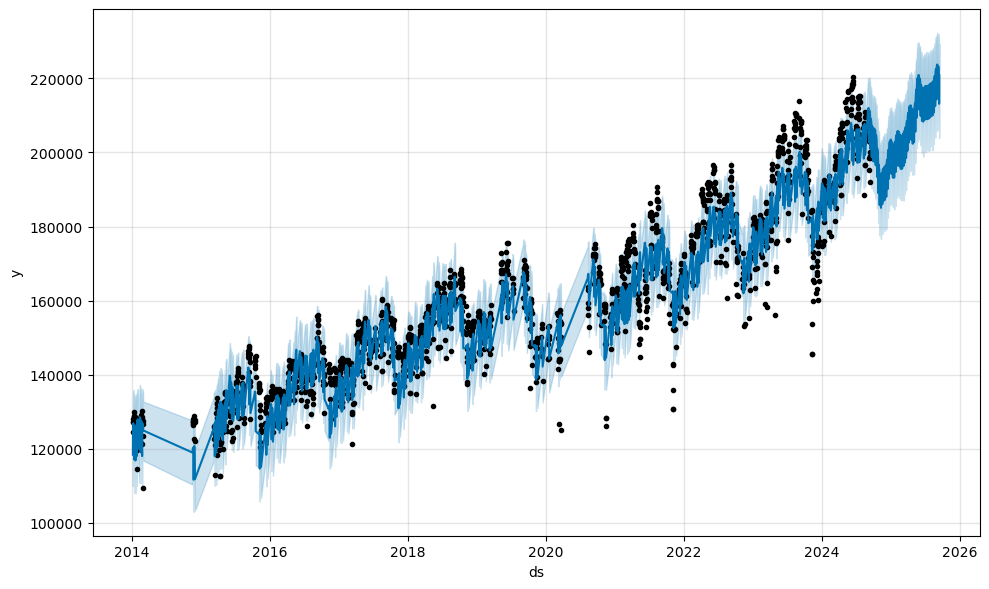

In [39]:
# Install the Prophet library if you haven't already
# 

import pandas as pd
from prophet import Prophet

# Prepare the data for Prophet
data = df[['Date', 'Total Demand']].rename(columns={'Date': 'ds', 'Total Demand': 'y'})

# Create and fit the Prophet model
model = Prophet()
model.fit(data)

# Create future dataframe for prediction
future = model.make_future_dataframe(periods=365)  # Predicting for 365 days into the future
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)


C:\Users\ABHAY\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ABHAY\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ABHAY\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ABHAY\AppData\Local\Temp\ipykernel_18544\823494970.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

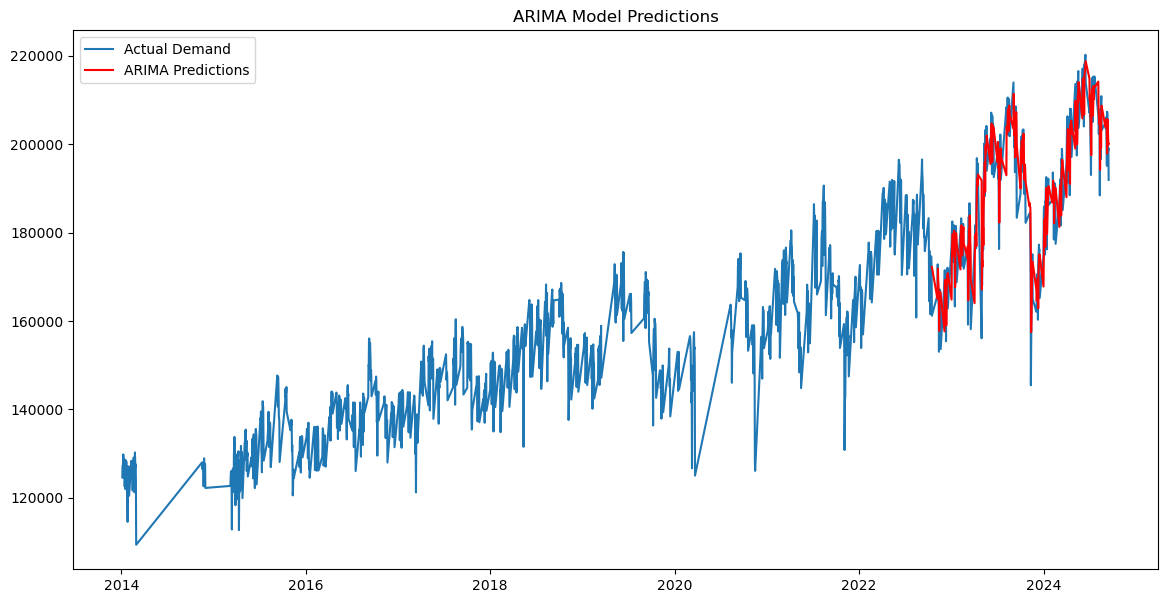

In [50]:
# Install statsmodels if you haven't already
# !pip install statsmodels

from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Setting the date as index
# df.set_index('Date', inplace=True)

# Fit the ARIMA model (p, d, q) needs to be determined. 
# Start with (1, 1, 1) or tune based on ACF/PACF plots.
model = ARIMA(df['Total Demand'], order=(1, 1, 1))
model_fit = model.fit()

# Make predictions
df['ARIMA_Predictions'] = model_fit.predict(start=len(df)-365, end=len(df)-1, dynamic=False)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df['Total Demand'], label='Actual Demand')
plt.plot(df['ARIMA_Predictions'], label='ARIMA Predictions', color='red')
plt.title('ARIMA Model Predictions')
plt.legend()
plt.show()

In [53]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
# Assuming you have the actual values in 'data['Total Demand']' 
# and predictions in 'data['ARIMA_Predictions']'

# Drop any rows with NaN values (if predictions start from a certain index)
predictions = df['ARIMA_Predictions'].dropna()
actual = df['Total Demand'].loc[predictions.index]

# Calculate MAE
mae = mean_absolute_error(actual, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate MSE
mse = mean_squared_error(actual, predictions)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate MAPE
mape = mean_absolute_percentage_error(actual, predictions)
print(f'Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%')


r2 = r2_score(actual, predictions)
print(r2)

Mean Absolute Error (MAE): 4620.6420537537215
Mean Squared Error (MSE): 38042759.37045537
Root Mean Squared Error (RMSE): 6167.88127078135
Mean Absolute Percentage Error (MAPE): 2.48%
0.8429333498491178


In [49]:
df = df[~df.index.duplicated()]

In [54]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Prepare the exogenous variables
exog_vars = df[['North Division Demand', 'West Division Demand',
       'South Division Demand', 'East Division Demand',
       'NorthEast Division Demand', 'NorthEast Division Shortage',
       'Total Shortage', 'Temperature (C)', 'Humidity (%)',
       'Wind Speed (kmph)']] # Include relevant features

# Fit the SARIMAX model (you need to specify the order and seasonal_order)
model = SARIMAX(df['Total Demand'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), exog=exog_vars)
model_fit = model.fit()

# Make predictions
df['SARIMAX_Predictions'] = model_fit.predict(start=len(df)-365, end=len(df)-1, exog=exog_vars.iloc[-365:])

# Calculate accuracy metrics (similar to previous)
predictions = df['SARIMAX_Predictions'].dropna()
actual = df['Total Demand'].loc[predictions.index]

# Calculate accuracy metrics
mae = mean_absolute_error(actual, predictions)
mse = mean_squared_error(actual, predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(actual, predictions)
r2 = r2_score(actual, predictions)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}, MAPE: {mape * 100:.2f}%, R2: {r2}')


C:\Users\ABHAY\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ABHAY\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ABHAY\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE: 0.03891437071286244, MSE: 0.002514889474906778, RMSE: 0.0501486737103463, MAPE: 0.00%, R2: 0.9999999999896169


C:\Users\ABHAY\AppData\Local\Temp\ipykernel_18544\3355541248.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SARIMAX_Predictions'] = model_fit.predict(start=len(df)-365, end=len(df)-1, exog=exog_vars.iloc[-365:])


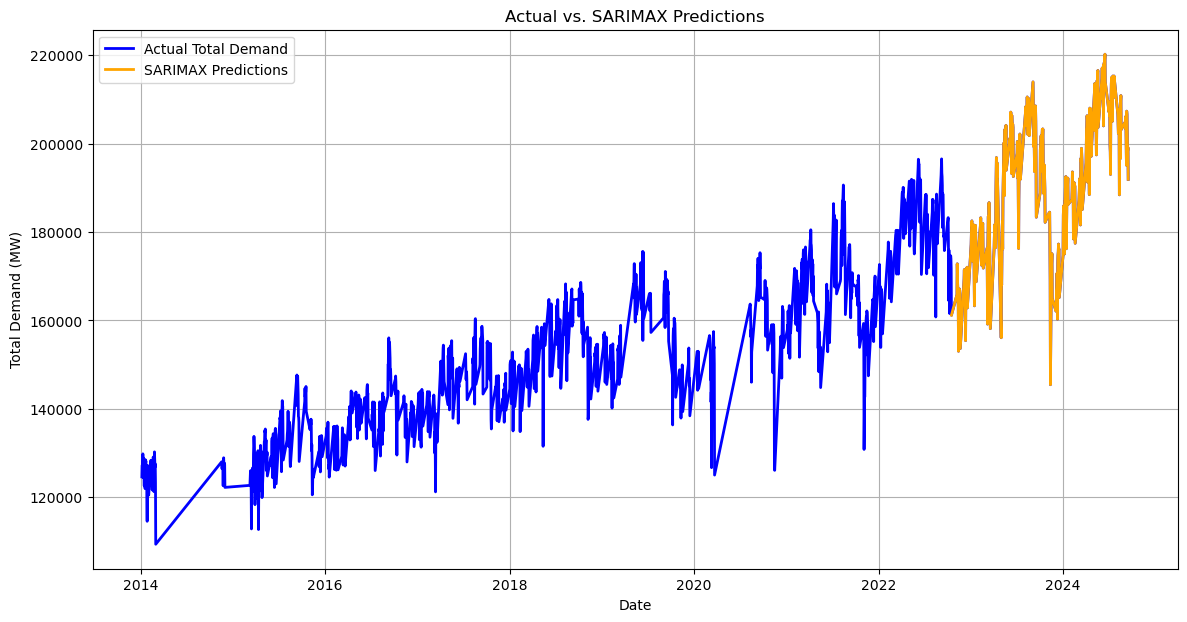

In [55]:
import matplotlib.pyplot as plt

# Assuming you have your predictions and actual values
actual = df['Total Demand']
predictions = df['SARIMAX_Predictions']

# Create the plot
plt.figure(figsize=(14, 7))
plt.plot(actual.index, actual, label='Actual Total Demand', color='blue', linewidth=2)
plt.plot(predictions.index, predictions, label='SARIMAX Predictions', color='orange', linewidth=2)
plt.title('Actual vs. SARIMAX Predictions')
plt.xlabel('Date')
plt.ylabel('Total Demand (MW)')
plt.legend()
plt.grid()
plt.show()
